This notebook demonstrate a Gaussian Process (GP) on a 1d system with squared-exponential (SE) kernel, aka RBF kernel.
 cf. MLaPP p.519
 

Given $N$ data points: $\mathcal{D}= \{ (x_i, f_i=f(x_i)), i=1, \dots,N \}$ (the functional form of $f$ is unknown, so $f_i$ represents the 'y' value ), we would like to use a GP to predict the function values at other locations.

The posterior can be written as 

\begin{equation}
p(f_* | \mathbf{X}_*, \mathbf{X}, \mathbf{f}) = \mathcal{N}(\mathbf{f}_* | \mu_{1|2}, \Sigma_{1|2}) \hspace{300pt}
\end{equation}

where
\begin{align}
\\
\mu_{1|2} &=& \mu(\mathbf{X}_*) + K_*^{T} K^{-1} (\mathbf{f} - \mu(\mathbf{X})) \hspace{300pt}  \\
\Sigma_{1|2} &=& K_{**} - K_{*}^{T} K^{-1} K_{*} \hspace{300pt}
\end{align}

we will try the squared-exponential (SE) kernel, also known as RBF kernel:
\begin{equation}
\kappa(x, x') = \exp{\big(-\dfrac{1}{2\sigma^2}(x-x')^2\big)} \hspace{300pt}
\end{equation}


In [64]:
import numpy as np
import scipy.spatial.distance

import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline


In [112]:
def meanFunc(xs):
    return 0*np.array(xs)


def kernelFunc(x1, x2, L=1.0):
    # For two vectors x1 and x2,
    #  scipy.spatial.distance.cdist(metric=euclidean) returns the Euclidean distance 
    #    between these two vectors, |x1-x2| = \sqrt( \sum_i (x1_i - x2_i)^2 )

    d = scipy.spatial.distance.cdist(np.reshape(x1, (len(x1), 1)), 
                                     np.reshape(x2, (len(x2), 1)), 
                                     metric='euclidean')
    d = d/L
    return 1.0*np.exp(-d**2/2.0)


In [47]:
def adjustAxeProperties(ax_obj, x_fontsize, x_rotation, y_fontsize, y_rotation):
    for tick in ax_obj.xaxis.get_major_ticks():
        tick.label.set_fontsize(x_fontsize)
        tick.label.set_rotation(x_rotation)
    for tick in ax_obj.yaxis.get_major_ticks():
        tick.label.set_fontsize(y_fontsize)
        tick.label.set_rotation(y_rotation)
        

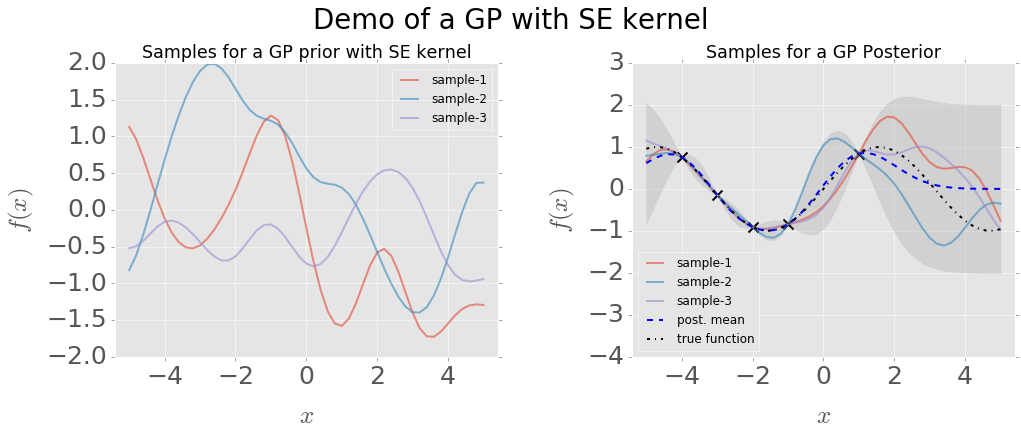

In [151]:
#np.random.seed(2445)

FONTSIZE = 25
plt.close('all')
fig = plt.figure(figsize=(14, 6))
gs = matplotlib.gridspec.GridSpec(1, 2)


# Plot samples from the prior
xs = np.arange(-5, 5.01, 0.2)
mu_prior = meanFunc(xs)
K_prior = kernelFunc(xs, xs) + 1e-8 * np.eye(N=len(xs))

XMIN, XMAX = np.min(xs)-0.4, np.max(xs)+0.4

ax = plt.subplot(gs[0, 0])
for i in range(3):
    fs = np.random.multivariate_normal(mu_prior, K_prior, 1)[0]

    ax.plot(xs, fs, linewidth=2, label='sample-{0:}'.format(i+1), alpha=0.6)

ax.set_xlim(XMIN, XMAX)
ax.set_xlabel(r'$x$', fontsize=FONTSIZE, labelpad=15)
ax.set_ylabel(r'$f(x)$', fontsize=FONTSIZE, labelpad=10)
adjustAxeProperties(ax, FONTSIZE, 0, FONTSIZE, 0)    
ax.legend(loc='best', fontsize=12)
legend = plt.legend()
legend.get_frame().set_facecolor('none')
ax.set_title('Samples for a GP prior with SE kernel', fontsize=FONTSIZE*0.7)


# data 
Xtrain = [-4, -3, -2, -1, 1]
ftrain = np.sin(Xtrain)

# Plot posterior
K = kernelFunc(Xtrain, Xtrain)
Ks = kernelFunc(Xtrain, xs)
Kss = kernelFunc(xs, xs) + 1e-8 * np.eye(N=len(xs))
Ki = np.linalg.inv(K)
mu_posterior = meanFunc(xs) + Ks.T.dot(Ki).dot(ftrain - meanFunc(Xtrain))
K_posterior = Kss - Ks.T.dot(Ki).dot(Ks)


ax = plt.subplot(gs[0, 1])
for i in range(3):
    fs = np.random.multivariate_normal(mu_posterior, K_posterior, 1)[0]
    ax.plot(xs, fs, linewidth=2, label='sample-{0:}'.format(i+1), alpha=0.6)
ax.plot(xs, mu_posterior, color='blue', linestyle='--', linewidth=2.0, label='post. mean')
ax.plot(xs, np.sin(xs), color='k', linestyle='-.', linewidth=2.0, label='true function')  

# add uncertainty, mean +/- 2 std
std = np.sqrt(np.diagonal(K_posterior))
ax.fill_between(xs, mu_posterior-2*std, mu_posterior+2*std, alpha=0.5, color='0.75')

ax.set_xlim(XMIN, XMAX)
ax.set_ylim(-4, 3)
ax.set_xlabel(r'$x$', fontsize=FONTSIZE, labelpad=15)
ax.set_ylabel(r'$f(x)$', fontsize=FONTSIZE, labelpad=10)
adjustAxeProperties(ax, FONTSIZE, 0, FONTSIZE, 0)
ax.scatter(Xtrain, ftrain, marker='x', s=100, linewidth=2, color='k')
ax.legend(loc=3, fontsize=12)
#legend = ax.legend()
#legend.get_frame().set_facecolor('none')
ax.set_title('Samples for a GP Posterior', fontsize=FONTSIZE*0.7)

plt.tight_layout(pad=0, w_pad=5.0, h_pad=0)
fig.suptitle('Demo of a GP with SE kernel', fontsize=1.1*FONTSIZE)
plt.subplots_adjust(top=0.85)
